<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/malaria_cell_images_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##  https://www.kaggle.com/sauravbhuyan/malaria-cell-images-detection

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2

img = cv2.imread("../content/drive/MyDrive/boteya malaria/Parasitized/anomalo.jpg")
img.shape

(480, 640, 3)

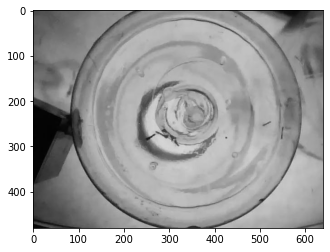

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [10]:
img_dir = "../content/drive/MyDrive/boteya malaria"



In [11]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.25
                                                            )
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                          validation_split = 0.25
                                                          )

In [32]:
train_data = train_gen.flow_from_directory(img_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32,
                                           classes = ["Parasitized","Uninfected"],
                                           seed = 42,
                                           subset = "training"                                           
                                           )
test_data = test_gen.flow_from_directory(img_dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         classes = ["Parasitized","Uninfected"],
                                         batch_size = 32,
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 688 images belonging to 2 classes.
Found 228 images belonging to 2 classes.


In [33]:
class_labels = list(train_data.class_indices.keys())

class_labels

['Parasitized', 'Uninfected']

In [34]:
image,label = train_data.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 2)


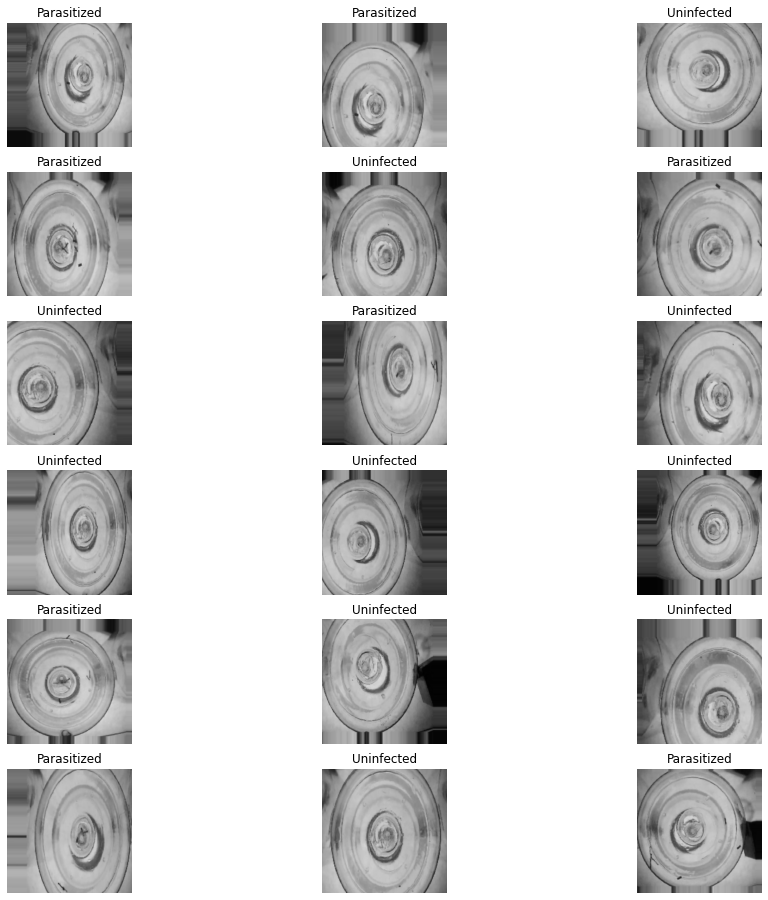

In [37]:
# visualizing the train data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):

  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(class_labels[tf.argmax(label[i])])
  plt.axis("off")


In [16]:
#building a CNN model
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             layers.Conv2D(filters=64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 64, kernel_size= 2, activation="relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 64, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size = 2),


                             layers.Flatten(),

                             layers.Dense(128, activation= "relu"),
                             layers.Dropout(0.5),
                             layers.Dense(2, activation="softmax"),
])


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [17]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [23]:
# fitting data to the model
model.fit(train_data,
          epochs = 50,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/50
22/22 [==============================] - 15s 680ms/step - loss: 0.2663 - accuracy: 0.8953 - val_loss: 0.4969 - val_accuracy: 0.6184
Epoch 2/50
22/22 [==============================] - 15s 672ms/step - loss: 0.2457 - accuracy: 0.9099 - val_loss: 0.3985 - val_accuracy: 0.6667
Epoch 3/50
22/22 [==============================] - 15s 670ms/step - loss: 0.1872 - accuracy: 0.9128 - val_loss: 0.3804 - val_accuracy: 0.8158
Epoch 4/50
22/22 [==============================] - 15s 667ms/step - loss: 0.2112 - accuracy: 0.9026 - val_loss: 0.3394 - val_accuracy: 0.8026
Epoch 5/50
22/22 [==============================] - 15s 661ms/step - loss: 0.1894 - accuracy: 0.9113 - val_loss: 0.4924 - val_accuracy: 0.7149
Epoch 6/50
22/22 [==============================] - 15s 663ms/step - loss: 0.1926 - accuracy: 0.9186 - val_loss: 0.2889 - val_accuracy: 0.8202
Epoch 7/50
22/22 [==============================] - 14s 653ms/step - loss: 0.1902 - accuracy: 0.9201 - val_loss: 0.1295 - val_accuracy: 0.9912

In [24]:
model_evaluation = model.evaluate(test_data)

8/8 [==============================] - 2s 203ms/step - loss: 0.0141 - accuracy: 1.0000


In [25]:
print(f"Model Accuracy: {model_evaluation[1] * 100:.2f} %")

Model Accuracy: 100.00 %


In [39]:
# save model and architecture to single file
model.save("boteyamalaria.h5")
print("Saved model to disk")





Saved model to disk


In [41]:

# serialize model to JSON
model_json = model.to_json()
with open("boteyamalaria.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("boteyamalara1.h5")
print("Saved model to disk")

Saved model to disk


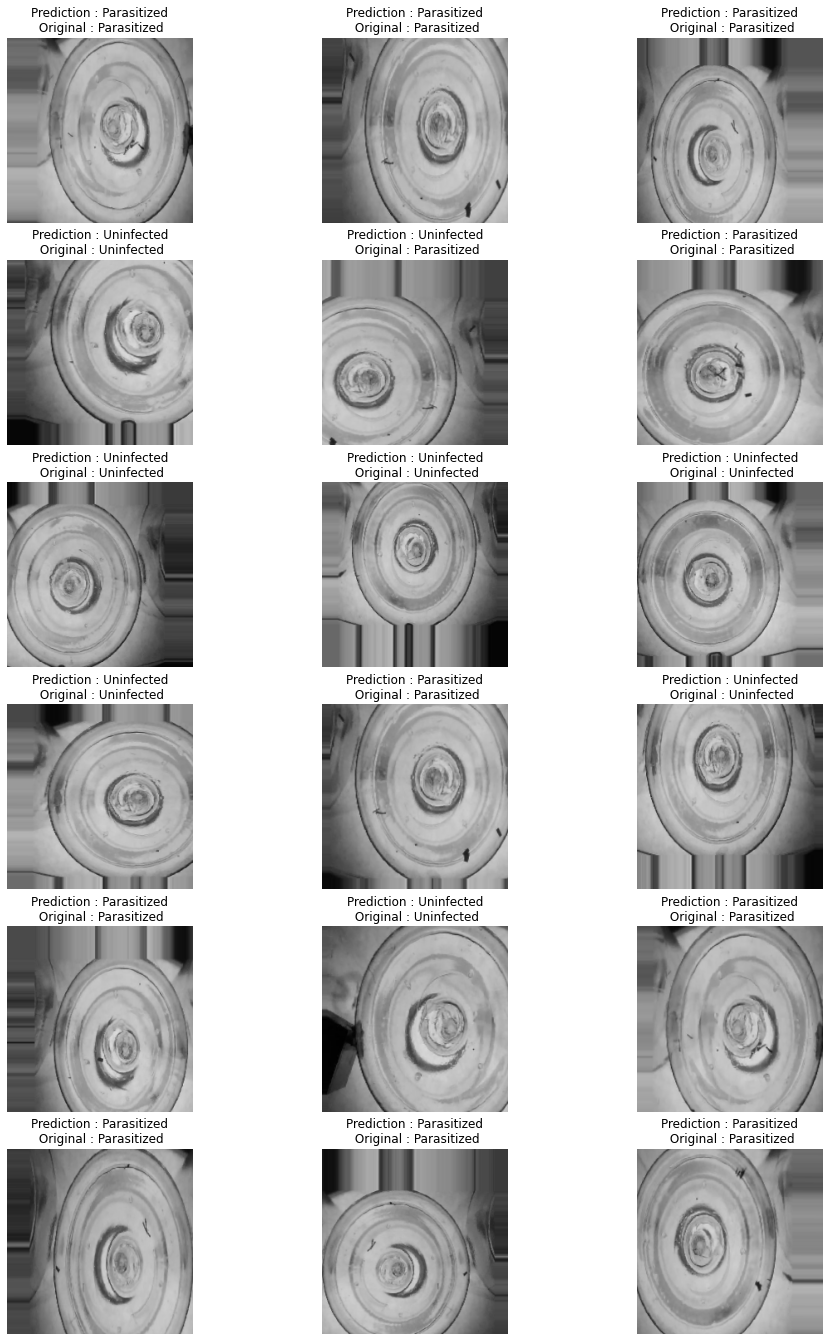

In [36]:
# visualizing the train data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):

  image,label = train_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction : {class_labels[tf.argmax(model_pred[i])]}\n Original : {class_labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top = 1.25)
  plt.axis("off")